# Hotel Booking Cancellations: Data Analysis & Prediction

**Context:**
This project analyzes a large hotel booking dataset to uncover patterns behind booking cancellations and predicts whether a reservation will be canceled using machine learning.

**Objective:**
- Understand the key factors affecting cancellations
- Build a logistic regression model to predict cancellations
- Communicate actionable insights for hotel managers

## 1. Data Loading and Initial Inspection

In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('hotel_bookings.csv')

# Display first rows and info
display(df.head())
df.info()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 2. Data Cleaning and Preprocessing

In [3]:
# Check for missing values
display(df.isnull().sum())

# Fill missing values and drop columns with too many missing
df['children'].fillna(0, inplace=True)
df['agent'].fillna(-1, inplace=True)
df['country'].fillna('Unknown', inplace=True)
df.drop(columns=['company'], inplace=True)

# Convert reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


<ipython-input-3-b3aeb97e3a0d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
<ipython-input-3-b3aeb97e3a0d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

## 3. Feature Engineering

In [4]:
# Extract date-related features
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_dayofweek'] = df['reservation_status_date'].dt.dayofweek

# Drop original date columns not needed for prediction
df.drop(columns=['reservation_status_date'], inplace=True)

## 4. Exploratory Data Analysis (EDA)

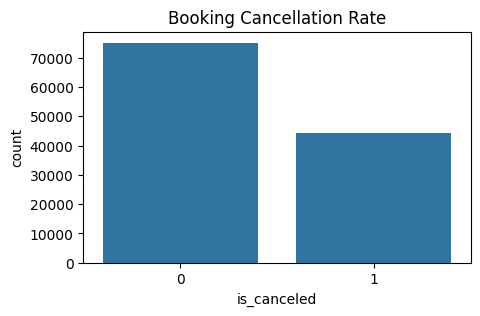

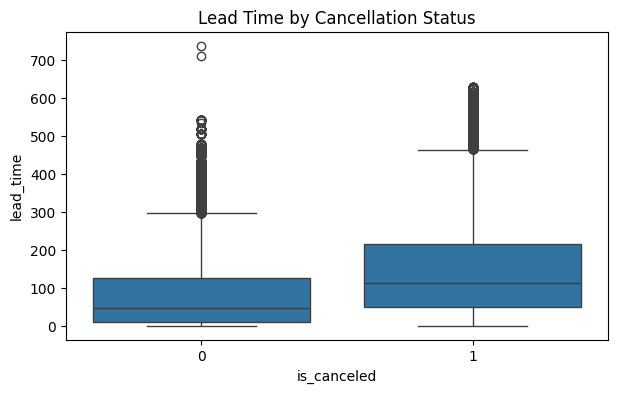

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cancellation rate
plt.figure(figsize=(5,3))
sns.countplot(x='is_canceled', data=df)
plt.title('Booking Cancellation Rate')
plt.show()

# Explore relationship between lead time and cancellation
plt.figure(figsize=(7,4))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time by Cancellation Status')
plt.show()

## 5. Data Preparation for Modeling

In [6]:
# Select features for modeling (drop highly unique IDs, target leakage columns, etc.)
drop_cols = ['reservation_status']
X = df.drop(columns=drop_cols + ['is_canceled'])
y = df['is_canceled']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

## 6. Model Training: Logistic Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]

# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_prob))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8238964737415194
ROC AUC Score: 0.8897546911013259

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87     14907
           1       0.82      0.68      0.74      8971

    accuracy                           0.82     23878
   macro avg       0.82      0.80      0.80     23878
weighted avg       0.82      0.82      0.82     23878



## 7. Conclusions & Recommendations

***Key Findings***

*   The cancellation rate is approximately 37% (about 44,000 out of 119,390 bookings).

*   Bookings with higher lead times are strongly associated with cancellations (as shown in the boxplot: median lead time for canceled bookings is much higher than for non-canceled).
*   The logistic regression model achieves an accuracy of 82% and a ROC AUC of 0.89.
*   The model’s recall for canceled bookings is 68%, meaning it identifies most cancellations but misses some, which is typical for imbalanced datasets.


***Business Recommendations***
*  Focus retention efforts on bookings with long lead times—these are the most likely to be canceled, so targeted communication or flexible policies could help reduce churn.
*  Consider dynamic policies (e.g., flexible cancellation, incentives, or extra engagement) for specific market segments or seasons where cancellation risk is higher.


***Next Step***
*  Explore more advanced models such as Random Forests or Gradient Boosting to improve recall and prediction accuracy for cancellations.
* Analyze the impact of pricing, special requests, and customer types to find actionable levers for reducing cancellations.
* Implement early warning systems for at-risk bookings and monitor the impact of interventions over time.